# Melanoma Detection Assignment


Melanoma, constituting one of over 200 variants of cancer, presents a formidable challenge due to its propensity for aggressive progression if not detected early. Diagnosis typically commences with a triphasic approach: clinical screening, dermoscopic analysis, and histopathological examination. Melanoma, especially, necessitates swift and accurate identification for effective treatment.

The initial stage involves a visual inspection of the skin lesion. Dermatologists employ high-speed cameras to capture dermatoscopic images, which serve as critical diagnostic aids. These images exhibit an inherent accuracy ranging from 65% to 80% in melanoma diagnosis, albeit without supplementary technical support.

Enhancing diagnostic precision entails subsequent evaluation by cancer treatment specialists, complemented by the analysis of dermatoscopic images. This combined approach elevates the overall prediction rate to an accuracy bracket of 75% to 84%.

In pursuit of optimizing melanoma diagnosis, there exists a project aimed at constructing an automated classification system. This system leverages image processing techniques to analyze and classify skin cancer using dermatoscopic images.

The problem is to develop a CNN-based model that is capable of reliably identifying melanoma. One kind of cancer that can be fatal if not found quickly is melanoma. It is the cause of 75% of deaths from skin cancer. A system that can analyze photos and notify physicians if melanoma is present could significantly lessen the amount of manual labor required for diagnosis.

In [ ]:
# Importing necessary libraries
import pathlib  # For handling file paths
import os  # For operating system related tasks

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization

import PIL  # Python Imaging Library for image processing

import tensorflow as tf  # TensorFlow library for machine learning tasks
from tensorflow import keras  # Keras API for building neural networks
from tensorflow.keras import layers  # Keras layers for building models
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers

from tensorflow.keras.optimizers import Adam  # Optimizer for gradient descent
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Callbacks for model training

from tensorflow.keras.preprocessing.image import load_img  # Function for loading images


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/Upgrad Assignment/CNN_assignment.zip" > /dev/null

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [ ]:
# Counting the number of images in the training directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))  # Counting the number of .jpg files in all subdirectories of the training directory
print(image_count_train)  # Printing the total number of images in the training directory

# Counting the number of images in the test directory
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))  # Counting the number of .jpg files in all subdirectories of the test directory
print(image_count_test)  # Printing the total number of images in the test directory


2239
118


In [ ]:
# Setting batch size for training
batch_size = 32  # Number of samples to process in each training batch

# Setting image height and width for resizing
img_height = 180  # Desired height of the input images
img_width = 180  # Desired width of the input images


In [ ]:
# Creating a TensorFlow Dataset from the training directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  # Directory containing the training images
    seed=123,  # Seed for shuffling the dataset
    validation_split=0.2,  # Percentage of data to use for validation
    subset='training',  # Subset of data to use (training set)
    image_size=(img_height, img_width),  # Desired height and width of the input images
    batch_size=batch_size  # Batch size for training
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
# Creating a TensorFlow Dataset from the validation directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  # Directory containing the training images
    seed=123,  # Seed for shuffling the dataset
    validation_split=0.2,  # Percentage of data to use for validation
    subset='validation',  # Subset of data to use (validation set)
    image_size=(img_height, img_width),  # Desired height and width of the input images
    batch_size=batch_size  # Batch size for validation
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# Getting the class names from the training dataset
class_names = train_ds.class_names  # Extracting the class names from the training dataset
print(class_names)  # Printing the class names

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


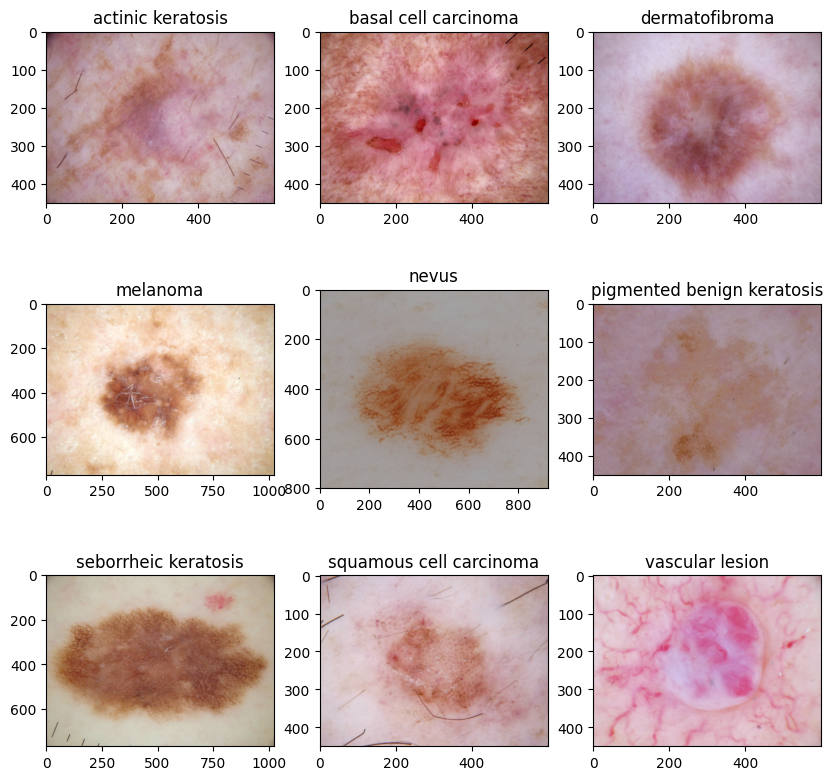

In [ ]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Setting the figure size for the plot
plt.figure(figsize=(10,10))

# Looping over the first 9 classes
for i in range(9):
    # Creating subplots
    plt.subplot(3, 3, i + 1)

    # Loading and displaying an image from the directory of the current class
    image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    plt.title(class_names[i])  # Setting the title of the subplot as the class name
    plt.imshow(image)  # Displaying the image

plt.show()  # Displaying the plot

In [ ]:
# Defining AUTOTUNE constant for buffer size optimization
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Caching, shuffling, and prefetching the training dataset
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Caching and prefetching the validation dataset
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# Import necessary modules from Keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

# Define the number of classes for classification
num_classes = 9

# Initialize the Sequential model
model = Sequential([
    # Rescale input pixel values to the range [0, 1]
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Add a convolutional layer with 32 filters, each with a kernel size of (5,5), using 'relu' activation
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (180, 180, 3)))

# Add another convolutional layer with 32 filters and (5,5) kernel size, using 'relu' activation
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))

# Add a max pooling layer to downsample the feature maps
model.add(MaxPool2D(pool_size=(2,2)))

# Add another convolutional layer with 32 filters and (5,5) kernel size, using 'relu' activation
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))

# Add a max pooling layer to downsample the feature maps
model.add(MaxPool2D(pool_size=(2,2)))

# Add another convolutional layer with 64 filters and (5,5) kernel size, using 'relu' activation
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))

# Add a max pooling layer to downsample the feature maps
model.add(MaxPool2D(pool_size=(2,2)))

# Add another convolutional layer with 64 filters and (5,5) kernel size, using 'relu' activation
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))

# Add a max pooling layer to downsample the feature maps
model.add(MaxPool2D(pool_size=(2,2)))

# Apply dropout regularization to prevent overfitting
model.add(Dropout(0.25))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected (dense) layer with softmax activation for classification
model.add(Dense(num_classes, activation = "softmax"))


In [ ]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    # Use the Adam optimizer for training, which is an adaptive learning rate optimization algorithm
    optimizer='adam',
    # Use Sparse Categorical Crossentropy loss function since the labels are integers and not one-hot encoded
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # Evaluate the model's performance using accuracy metric
    metrics=['accuracy']
)

In [ ]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

In [ ]:
# Define the number of epochs for training
epochs = 30

# Train the model using the fit method
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs  # Number of epochs for training
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 31s 159ms/step - loss: 2.0782 - accuracy: 0.1780 - val_loss: 2.0751 - val_accuracy: 0.1499
Epoch 2/30
56/56 [==============================] - 5s 92ms/step - loss: 2.0177 - accuracy: 0.2015 - val_loss: 1.9210 - val_accuracy: 0.2975
Epoch 3/30
56/56 [==============================] - 5s 88ms/step - loss: 1.9576 - accuracy: 0.2427 - val_loss: 2.0067 - val_accuracy: 0.2349
Epoch 4/30
56/56 [==============================] - 5s 86ms/step - loss: 1.9011 - accuracy: 0.2679 - val_loss: 1.8030 - val_accuracy: 0.3244
Epoch 5/30
56/56 [==============================] - 5s 88ms/step - loss: 1.7581 - accuracy: 0.3465 - val_loss: 1.7174 - val_accuracy: 0.3781
Epoch 6/30
56/56 [==============================] - 5s 86ms/step - loss: 1.6709 - accuracy: 0.3890 - val_loss: 1.6275 - val_accuracy: 0.4049
Epoch 7/30
56/56 [==============================] - 5s 88ms/step - loss: 1.6409 - accuracy: 0.3929 - val_loss: 1.6220 - val_accuracy: 0.4206
Epoch 8/30
56/56 [====

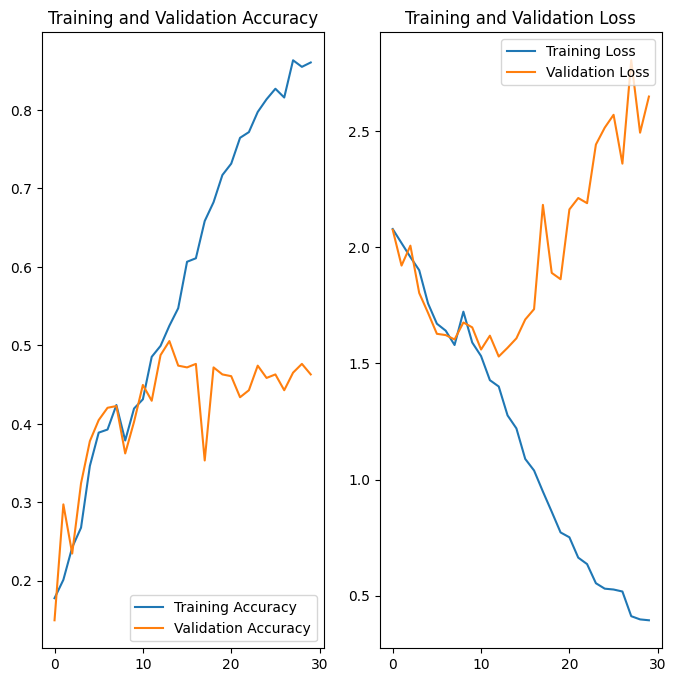

In [ ]:
# Extracting accuracy and loss values from training history
acc = history.history['accuracy']            # Training accuracy
val_acc = history.history['val_accuracy']    # Validation accuracy
loss = history.history['loss']               # Training loss
val_loss = history.history['val_loss']       # Validation loss

# Defining range for epochs
epochs_range = range(epochs)

# Plotting training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')     # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')   # Plot validation accuracy
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Data augmentation using Sequential API
data_augment = keras.Sequential([
    # Randomly flipping the input images horizontally and vertically
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),

    # Randomly rotating the input images by a factor within the range [-20%, 20%] of the image's original size
    layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),

    # Randomly zooming into the input images by a factor within the range [0.8, 0.9] of the image's original size
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

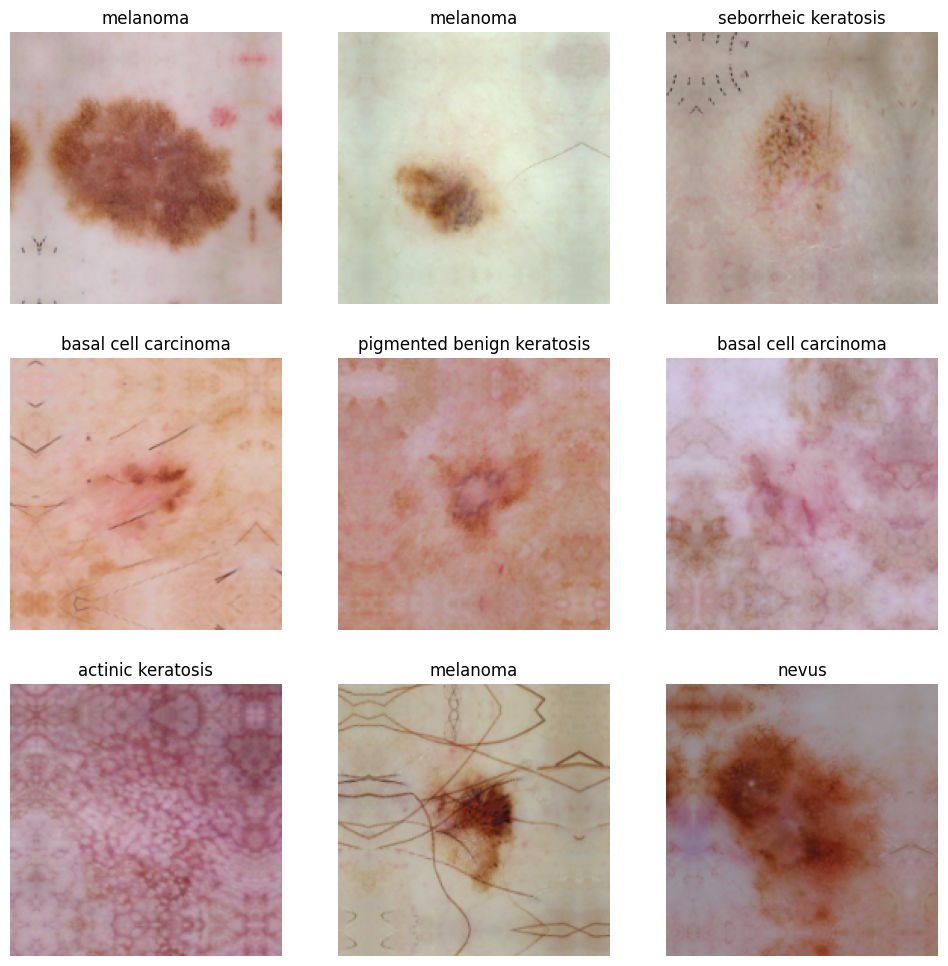

In [ ]:
# Visualizing the augmentation strategy for one instance of a training image
plt.figure(figsize=(12, 12))

# Taking one batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    # Looping over the images in the batch
    for i in range(9):
        # Creating subplots
        ax = plt.subplot(3, 3, i + 1)

        # Applying data augmentation to the image and converting it to uint8 type for display
        augmented_image = data_augment(images)[i].numpy().astype("uint8")

        # Displaying the augmented image
        plt.imshow(augmented_image)

        # Setting title as the corresponding class name
        plt.title(class_names[labels[i]])

        # Turning off axis
        plt.axis("off")

# Displaying the plot
plt.show()

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# Number of classes
num_classes = 9

# Creating a Sequential model with data augmentation
model = Sequential([
    data_augment,  # Data augmentation layer
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))  # Rescaling layer for preprocessing input images
])

# Adding convolutional layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flattening layer
model.add(Flatten())

# Output layer
model.add(Dense(num_classes, activation="softmax"))  # Dense layer with softmax activation for classification

In [ ]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',  # Adam optimizer, an efficient gradient-based optimization algorithm
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Sparse categorical crossentropy loss function for integer labels
    metrics=['accuracy']  # Evaluation metric to monitor during training and testing
)

In [ ]:
epochs = 30  # Number of epochs for training

# Train the model using the fit method
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=epochs  # Number of epochs for training
)

Epoch 1/30
56/56 [==============================] - 11s 119ms/step - loss: 2.0611 - accuracy: 0.1819 - val_loss: 2.0212 - val_accuracy: 0.1946
Epoch 2/30
56/56 [==============================] - 6s 106ms/step - loss: 2.0232 - accuracy: 0.2020 - val_loss: 1.9836 - val_accuracy: 0.2752
Epoch 3/30
56/56 [==============================] - 6s 108ms/step - loss: 1.9816 - accuracy: 0.2439 - val_loss: 1.9189 - val_accuracy: 0.2237
Epoch 4/30
56/56 [==============================] - 6s 106ms/step - loss: 1.8914 - accuracy: 0.2835 - val_loss: 1.8607 - val_accuracy: 0.2819
Epoch 5/30
56/56 [==============================] - 6s 107ms/step - loss: 1.7854 - accuracy: 0.3449 - val_loss: 1.6553 - val_accuracy: 0.4295
Epoch 6/30
56/56 [==============================] - 6s 106ms/step - loss: 1.6663 - accuracy: 0.3956 - val_loss: 1.6706 - val_accuracy: 0.4362
Epoch 7/30
56/56 [==============================] - 6s 106ms/step - loss: 1.5444 - accuracy: 0.4442 - val_loss: 1.5219 - val_accuracy: 0.4698
Epoch

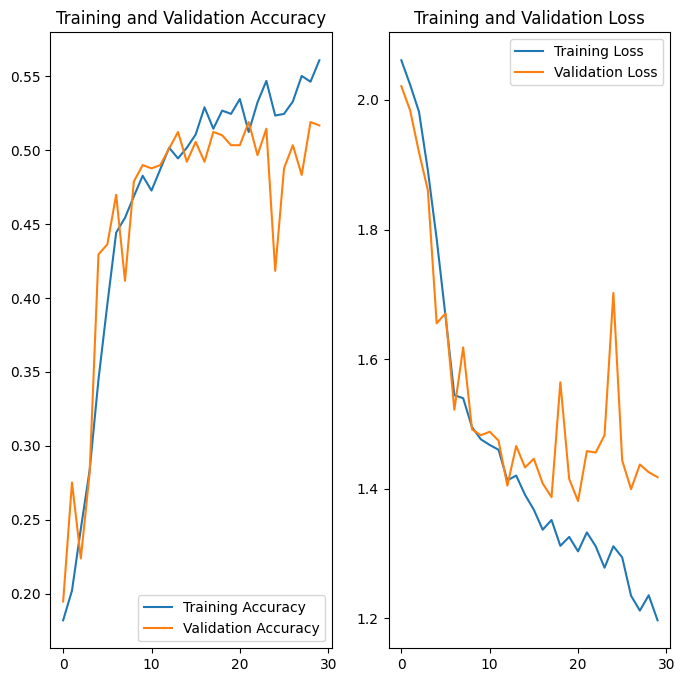

In [ ]:
# Extracting accuracy and loss values from training history
acc = history.history['accuracy']            # Training accuracy
val_acc = history.history['val_accuracy']    # Validation accuracy
loss = history.history['loss']               # Training loss
val_loss = history.history['val_loss']       # Validation loss

epochs_range = range(epochs)  # Defining range for epochs

# Plotting training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')     # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')   # Plot validation accuracy
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Empty lists to store file paths and corresponding labels
path_list = []
lesion_list = []

# Looping over each class
for i in class_names:
    # Looping over all image files within the directory of the current class
    for j in data_dir_train.glob(i+'/*.jpg'):
        # Appending the file path and label to the respective lists
        path_list.append(str(j))
        lesion_list.append(i)

# Creating a dictionary mapping file paths to labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Creating a DataFrame from the dictionary
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

In [ ]:
# Creating a dictionary mapping file paths to labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Creating a DataFrame from the dictionary
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

<BarContainer object of 9 artists>

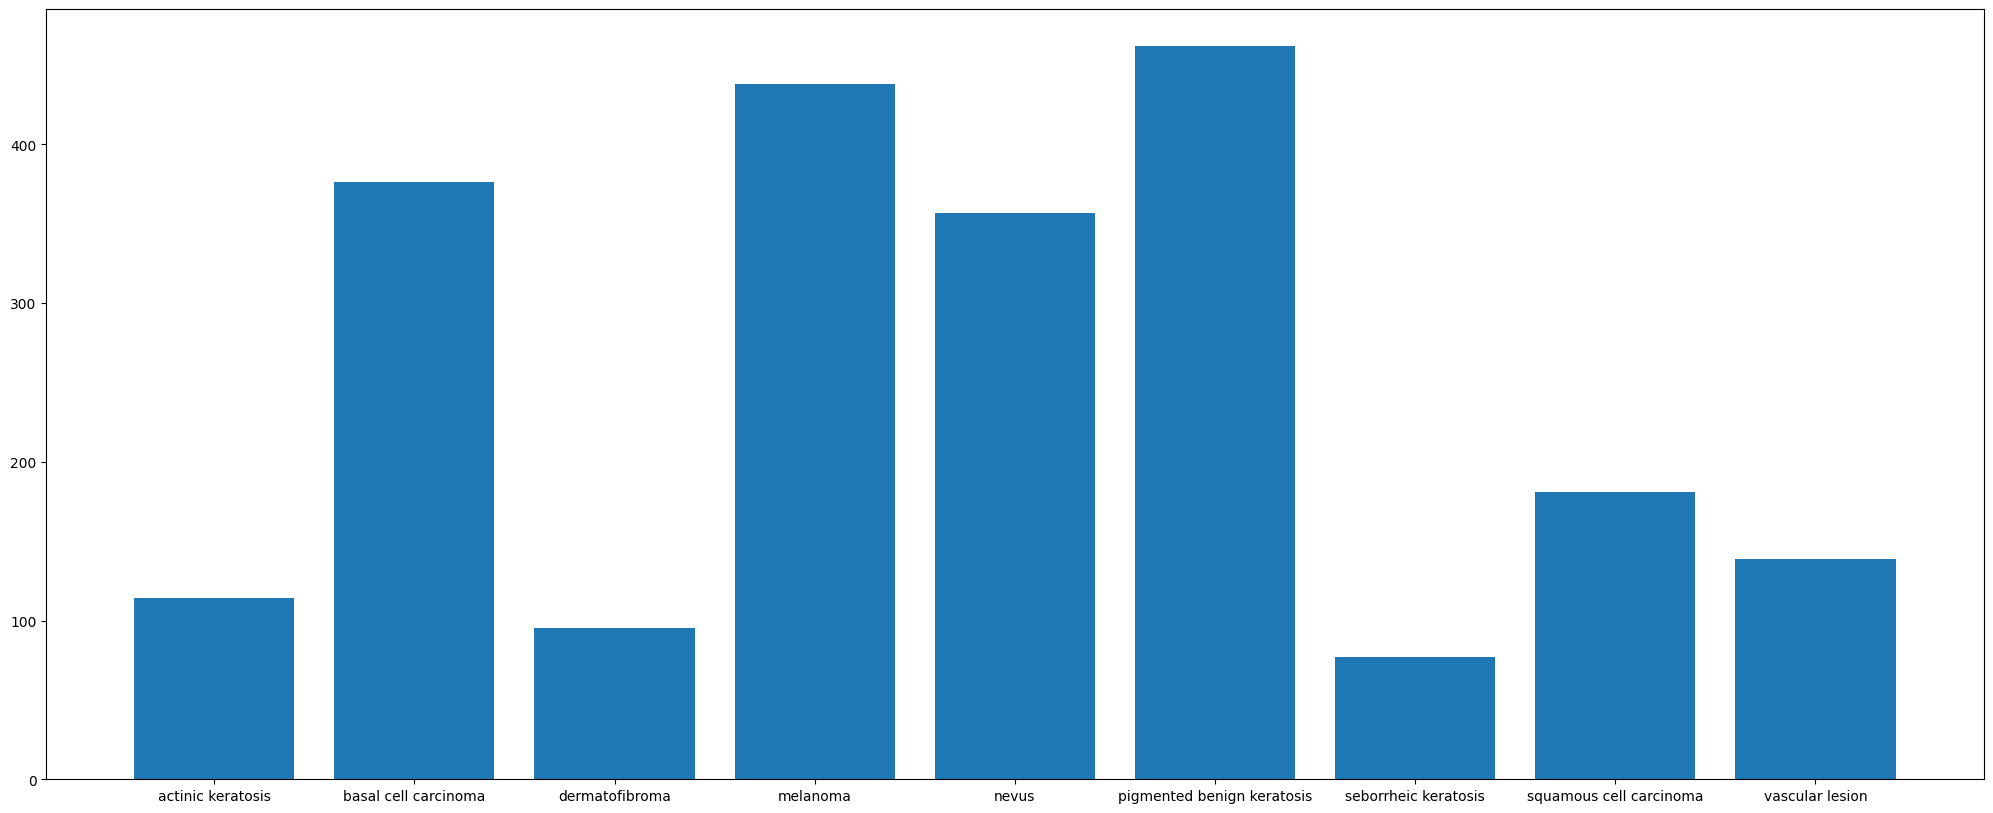

In [ ]:
# Empty list to store the count of images for each class
count = []

# Counting the number of images for each class
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))

# Plotting the count of images for each class
plt.figure(figsize=(25,10))
plt.bar(class_names, count)

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
!pip install Augmentor

In [ ]:
# Importing the Augmentor library
import Augmentor

# Looping over each class
for i in class_names:
    # Creating an Augmentor Pipeline for the training dataset directory of the current class
    p = Augmentor.Pipeline("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train", save_format='jpg')
    
    # Applying rotation augmentation with a probability of 0.7 and maximum rotation angles
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # Generating 500 augmented samples for each class to ensure class balance
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC7E84EC400>: 100%|██████████| 500/500 [00:37<00:00, 13.33 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC767479630>: 100%|██████████| 500/500 [00:34<00:00, 14.51 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC7E80CC880>: 100%|██████████| 500/500 [00:41<00:00, 12.17 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DC767321660>: 100%|██████████| 500/500 [00:43<00:00, 11.50 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC76729F160>: 100%|██████████| 500/500 [00:32<00:00, 15.25 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC76749E0B0>: 100%|██████████| 500/500 [00:43<00:00, 11.47 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DC767301900>: 100%|██████████| 500/500 [00:44<00:00, 11.16 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DC7674BDC00>: 100%|██████████| 500/500 [00:33<00:00, 15.02 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DC770528130>: 100%|██████████| 500/500 [00:49<00:00, 10.02 Samples/s]


In [ ]:
import pathlib

# Define the path to the directory containing the augmented images
data_dir_train1 = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")

# Count the number of images in the directory
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print("Number of augmented images:", image_count_train1)

4500


In [ ]:
import pandas as pd
# Empty lists to store file paths and corresponding labels
path_list = []
lesion_list = []

# Looping over each class
for i in class_names:
    # Looping over all image files within the directory of the current class
    for j in data_dir_train1.glob(i+'/*.jpg'):
        # Appending the file path and label to the respective lists
        path_list.append(str(j))
        lesion_list.append(i)

# Creating a dictionary mapping file paths to labels
dataframe_dict_original = dict(zip(path_list, lesion_list))

# Creating a DataFrame from the dictionary
new_df = pd.DataFrame(list(dataframe_dict_original.items()), columns=['Path', 'Label'])

,Path,Label
0,/content/Skin cancer ISIC The International Sk...,actinic keratosis
1,/content/Skin cancer ISIC The International Sk...,actinic keratosis
2,/content/Skin cancer ISIC The International Sk...,actinic keratosis
3,/content/Skin cancer ISIC The International Sk...,actinic keratosis
4,/content/Skin cancer ISIC The International Sk...,actinic keratosis
...,...,...
6734,/content/Skin cancer ISIC The International Sk...,vascular lesion
6735,/content/Skin cancer ISIC The International Sk...,vascular lesion
6736,/content/Skin cancer ISIC The International Sk...,vascular lesion
6737,/content/Skin cancer ISIC The International Sk...,vascular lesion


In [ ]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1388
melanoma                      1309
basal cell carcinoma          1141
nevus                         1063
squamous cell carcinoma        538
vascular lesion                436
actinic keratosis              346
dermatofibroma                 282
seborrheic keratosis           236
Name: count, dtype: int64

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
data_dir_train1=pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [ ]:
data_dir_train1

PosixPath('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Create an ImageDataGenerator for the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train1,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


tf.keras.preprocessing.image_dataset_from_directory() to create a tf.data.Dataset object for the validation dataset. It loads images from the specified directory data_dir_train1, splits the dataset into training and validation subsets with the validation_split parameter, selects the validation subset using subset='validation', resizes the images to the specified dimensions (img_height and img_width), and batches the data with the specified batch size (batch_size). Let me know if you have any questions!

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers

num_classes = 9

# Initialize the Sequential model
model = Sequential([
    # Rescaling layer for preprocessing input images
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Adding convolutional layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu', input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding Dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Output layer
model.add(Dense(num_classes, activation="softmax"))  # Dense layer with softmax activation for classification


In [ ]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 38s 198ms/step - loss: nan - accuracy: 0.0226 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 36s 208ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 32s 182ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 32s 186ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 33s 189ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 34s 197ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 32s 187ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

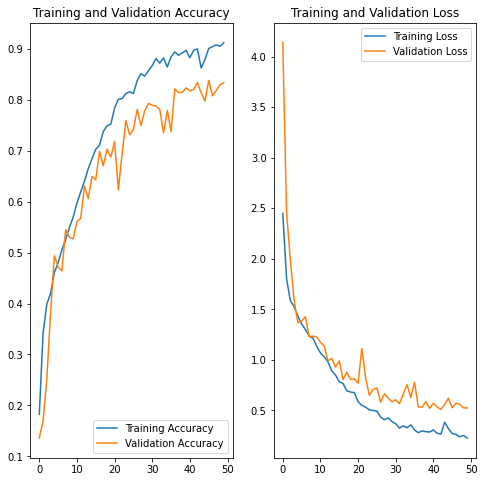

- Using the Augmentor library has improved training data accuracy.

- The model continues to overfit.

- More layers, neurons, or dropout layers can be added to address the overfitting issue.

- The hyperparameter can be adjusted to further enhance the model.ameter